# Capstone Project: I want to watch a movie...
**Author:** Cole Beevor-Potts

**Current Date:** December 11th 2023

### Table of Contents
- [Inroduction](#introduction)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  - [Early EDA Insights](#early-eda-insights)
  - [Ratings EDA & Feature Engineering](#ratings-eda-&-feature-engineering)
  - [Movie Rating Summary Insights](#movie-rating-summary-insights)
  - [Users Data](#users-data)
- [Creating Dataframe for Pre-Processing](#creating-dataframe-for-pre-processing)
    - [Correlation Insights](#correlation-insights)
    - [Final Dataframe](#final-dataframe)
    - [Data Dictionary](#data-dictionary)
- [Pre-Processing & Vectorization](#pre-processing-&-vectorization)
    - [Pre-Processing Summary](#pre-processing_summary)
- [Modelling](#modelling)
    - [Modelling Insights](#modelling-insights)
- [Next Steps](#next-steps)

## Introduction

Welcome to my Bainstation Data Science Capstone project: the Movie Recommender System. As a film lover, I've experienced the frustration of spending too much time searching for the perfect movie, only to end up disappointed. This project aims to change that.

I will be using a dataset scraped from Letterboxd that is available on Kaggle by Sam Learner. Find the dataset here: https://www.kaggle.com/datasets/samlearner/letterboxd-movie-ratings-data

I'll use machine learning to personalize recommendations based on individual tastes. The goal? To save time, offer efficient movie choices, and ensure a satisfying movie night, whether you're a casual viewer, a busy professional, a movie fanatic, or someone seeking tailored suggestions.

This project isn't just about recommending movies; it's a data-driven journey to transform how we enjoy films. Join me in redefining the movie-watching experience, making it more enjoyable and stress-free for all cinephiles!

## Exploratory Data Analysis

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The data is comprised of 3 files: Movies, Ratings, and Users. The data is robust with 3 files, 28 total columns, and the rating table having over 11 million unique reviews to pull from.

To begin, lets load in all the data.

In [91]:
ratings = pd.read_csv("data/ratings_export.csv")

In [92]:
users = pd.read_csv("data/users_export.csv")

In [93]:
# We were encountering a parsing error when loading the data, lineterminator resolved this 
movies = pd.read_csv('data/movie_data.csv', lineterminator='\n')

For our movies data set, we were encountering a parsing error when attempting to load the data. The on_bad_lines will skip and lines that would cause this error to occur.

Lets continue into looking at what our data looks like:

**Movies:** Data on every movie represented in the ratings data. This makes up a very large, but incomplete set of all movies on Letterboxd. 

In [94]:
#Dimensions of movies df
movies.shape

(273641, 19)

Our data has 273,641 movies with 19 columns. Lets take a look at what columns we have and trim down qualititavely based on what we want to keep for now. We may drop more letter after quantitative analysis: 

In [95]:
movies.head()

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018.0


We will immediately select our columns of potential interest:

Note: We keep movie id over movie title for matching purposed with our other dataset

In [96]:
columns_of_interest=['_id','genres','movie_id','original_language', 'overview','popularity','release_date','runtime','vote_average','vote_count','year_released']
movies_clean = movies[columns_of_interest]

In [97]:
#Sanity Check
movies_clean.shape

(273641, 11)

In [98]:
movies_clean.head()

,_id,genres,movie_id,original_language,overview,popularity,release_date,runtime,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",football-freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,1971-12-05,0.0,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],aftermath-1960,en,Aftermath was the pilot for an unsold TV serie...,0.600,1960-04-17,22.0,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",where-chimneys-are-seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,1953-03-05,108.0,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",the-musicians-daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,1911-12-12,15.0,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",50-years-of-fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,2018-05-17,75.0,0.0,0.0,2018.0


Lets check for duplicates:

In [99]:
movies_clean.duplicated().sum()

0

There are no duplicates.

Now lets check for nulls:

In [100]:
movies_clean.isnull().sum()

_id                      0
genres                9976
movie_id                 2
original_language     9976
overview             22502
popularity            9976
release_date         13367
runtime              14659
vote_average          9977
vote_count            9977
year_released         7039
dtype: int64

We have a sizeable amount of nulls here, lets check what they are as a percentage:
    

In [101]:
movies_clean.isnull().sum() / movies.shape[0]

_id                  0.000000
genres               0.036457
movie_id             0.000007
original_language    0.036457
overview             0.082232
popularity           0.036457
release_date         0.048849
runtime              0.053570
vote_average         0.036460
vote_count           0.036460
year_released        0.025723
dtype: float64

Our column with the most amount of nulls is Overview with 8.2%. All of our columns are within single digit percent. 

Lets filter some columns first and then we will return to this.

In [102]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273641 entries, 0 to 273640
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                273641 non-null  object 
 1   genres             263665 non-null  object 
 2   movie_id           273639 non-null  object 
 3   original_language  263665 non-null  object 
 4   overview           251139 non-null  object 
 5   popularity         263665 non-null  float64
 6   release_date       260274 non-null  object 
 7   runtime            258982 non-null  float64
 8   vote_average       263664 non-null  float64
 9   vote_count         263664 non-null  float64
 10  year_released      266602 non-null  float64
dtypes: float64(5), object(6)
memory usage: 23.0+ MB


We have floats and objects as datatypes which is fine.

#### Early EDA Insights
* The Popularity, vote_average, and vote_count are actualy from The Movie Database and not scraped from Letterboxd. This kaggle dataset came like this.
    * We will look at feature engineering this in from our ratings dataframe
* We have 270k+ movies within our data frame, we are going to look at reducing that greatly. To start lets only select movies where:
    * Original language is "en" or english
    * Meet a certain minimum number of reviews we will determine
    * Meet a minimum rating 
    
**Note:** We will calculate the minimum number of reviews and minimum rating once we have brought them over from our Ratings table.

Lets drop all rows where the overview is null. This will be a key feature within our machine learning model based on our data.

In [103]:
movies_clean.loc[pd.isna(movies['overview'])]

,_id,genres,movie_id,original_language,overview,popularity,release_date,runtime,vote_average,vote_count,year_released
7,5fc85ff26758f696344ace53,[],terra-di-transito,it,NaN,0.600,2014-09-11,0.0,5.0,2.0,2014.0
13,5fc85ff26758f696344acf13,"[""Comedy""]",hochwurden-wird-papa,de,NaN,0.600,2003-05-23,89.0,0.0,0.0,2003.0
22,5fc85ff26758f696344ad0e3,NaN,k-on-live-house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0
47,5fc85ff26758f696344ad0a2,"[""Music"",""Comedy""]",e-de-chua,pt,NaN,0.846,1958-01-01,0.0,0.0,0.0,1958.0
53,5fc85f606758f69634496feb,[],paper-shoes,en,NaN,0.600,1972-01-01,8.0,0.0,0.0,1972.0
...,...,...,...,...,...,...,...,...,...,...,...
273622,61e2eb830109cc2a5d90e29c,NaN,komi-cant-communicate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
273634,61e333910109cc2a5da2c7ff,NaN,film:771692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273635,61e34d160109cc2a5da8c79e,NaN,suburban-knights-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273636,61e34d160109cc2a5da8c79f,NaN,to-boldly-flee-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#Percent of movies in dataset with null in overview column
movies_clean.loc[pd.isna(movies['overview'])].shape[0] / movies_clean.shape[0]

0.08223182929458671

8% of our movies have null values within the over view column. We will go ahead and drop these.

In [105]:
# Drop rows where 'overview' column is NaN
movies_clean.dropna(subset=['overview'], inplace=True)

/var/folders/bm/khpbl2351cn5d9k4dq8zj0x40000gn/T/ipykernel_1295/3976231697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean.dropna(subset=['overview'], inplace=True)


In [106]:
movies_clean.loc[pd.isna(movies['overview'])].shape[0]

0

Better!

For now lets see how many rows where original language is not english. We may drop a few good movies here, but that will be fairly edge case. 

In [107]:
#Lets take a quick look at a sample of null valued original language movies 
#to make sure we arent dropping anything crazy
movies_clean.loc[movies['original_language'] != 'en']


,_id,genres,movie_id,original_language,overview,popularity,release_date,runtime,vote_average,vote_count,year_released
2,5fc85f606758f69634496fcd,"[""Drama""]",where-chimneys-are-seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,1953-03-05,108.0,6.6,10.0,1953.0
19,5fc85ff26758f696344ad09d,"[""Drama"",""War""]",the-enemy-lines,fr,Six men. The forest. The menace is there somew...,1.400,2010-05-08,44.0,5.3,4.0,2010.0
26,5fc85ff26758f696344ad083,"[""Drama""]",white-people-1970,sr,"White people live in white houses, wear white ...",0.600,1970-01-01,11.0,0.0,0.0,1970.0
33,5fc85ff26758f696344acee9,"[""Drama""]",pink-punch,es,Jimmy Morales is a young fighter with a short ...,1.135,2004-03-22,100.0,3.1,6.0,2004.0
34,5fc85ff26758f696344acf04,"[""Drama"",""Action"",""Adventure"",""Thriller""]",europe-raiders,zh,Mr. Lin and Ms. Lin are the number one and num...,3.629,2018-08-17,101.0,7.7,34.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
273626,61e303ac0109cc2a5d974b45,"[""Comedy""]",feedback-2020,ru,"On December 31, seven friends gather again in ...",1.793,2020-12-17,0.0,6.1,17.0,2020.0
273627,61e303ac0109cc2a5d974b4e,"[""Drama"",""Romance""]",the-three,ru,"A husband, a wife and another woman. Only thre...",0.698,2020-12-03,127.0,6.0,1.0,2020.0
273628,61e303ac0109cc2a5d974b57,"[""Drama""]",ii-2019,ru,"Nastya, Sasha and Kristina are 16 years old. T...",0.600,2019-10-17,61.0,7.7,3.0,2019.0
273629,61e303ac0109cc2a5d974b60,"[""Comedy"",""Crime""]",dont-cry-mommy-1997,ru,Wedding in a provincial seaside town. In the m...,1.933,1997-02-24,83.0,5.6,9.0,1997.0


93 thousand. Lets note this and we may come back to it later. 

In [108]:
#All movies that have original language as english
#movies_clean.loc[movies_clean['original_language'] == 'en']

In [109]:
#Movies that are not english orignally over all the movie in our data
#movies_clean.loc[movies['original_language'] != 'en'].shape[0] / movies.shape[0]

In [110]:
#movies_clean = movies.loc[movies['original_language'] == 'en']

Lets check on our nulls again:

In [111]:
#Sum of nulls for each feature
movies_clean.isnull().sum()

_id                     0
genres                  0
movie_id                2
original_language       0
overview                0
popularity              0
release_date         3031
runtime              3231
vote_average            1
vote_count              1
year_released        3066
dtype: int64

Lets check as a percentage of total rows again.

In [112]:
#Percentage of nulls in each row
movies_clean.isnull().sum() / movies.shape[0]

_id                  0.000000
genres               0.000000
movie_id             0.000007
original_language    0.000000
overview             0.000000
popularity           0.000000
release_date         0.011077
runtime              0.011807
vote_average         0.000004
vote_count           0.000004
year_released        0.011204
dtype: float64

Lets drop the two movies that do not have movie_id

In [113]:
#Drop null movie id
movies_clean.dropna(subset=['movie_id'], inplace=True)

/var/folders/bm/khpbl2351cn5d9k4dq8zj0x40000gn/T/ipykernel_1295/604585581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean.dropna(subset=['movie_id'], inplace=True)


In [114]:
#Sum of nulls for each feature
movies_clean.isnull().sum()

_id                     0
genres                  0
movie_id                0
original_language       0
overview                0
popularity              0
release_date         3031
runtime              3231
vote_average            1
vote_count              1
year_released        3066
dtype: int64

In [115]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251137 entries, 0 to 273640
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                251137 non-null  object 
 1   genres             251137 non-null  object 
 2   movie_id           251137 non-null  object 
 3   original_language  251137 non-null  object 
 4   overview           251137 non-null  object 
 5   popularity         251137 non-null  float64
 6   release_date       248106 non-null  object 
 7   runtime            247906 non-null  float64
 8   vote_average       251136 non-null  float64
 9   vote_count         251136 non-null  float64
 10  year_released      248071 non-null  float64
dtypes: float64(5), object(6)
memory usage: 23.0+ MB


For all of our numerical columns lets fill in with median values:


In [116]:
numerical_columns = ['vote_average', 'vote_count', 'runtime','year_released']

# Replace nulls in numerical columns with their respective medians
for column in numerical_columns:
    median_value = movies_clean[column].median()
    movies_clean[column].fillna(median_value, inplace=True)

/var/folders/bm/khpbl2351cn5d9k4dq8zj0x40000gn/T/ipykernel_1295/928490915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean[column].fillna(median_value, inplace=True)


In [117]:
#Sanity check
movies_clean.isnull().sum()

_id                     0
genres                  0
movie_id                0
original_language       0
overview                0
popularity              0
release_date         3031
runtime                 0
vote_average            0
vote_count              0
year_released           0
dtype: int64

Finally we will fill our nulls within release date with a placehold:

In [118]:
# Replace nulls in 'release_date' column with a placeholder
movies_clean['release_date'].fillna('Not Available', inplace=True)

/var/folders/bm/khpbl2351cn5d9k4dq8zj0x40000gn/T/ipykernel_1295/1957920464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean['release_date'].fillna('Not Available', inplace=True)


In [119]:
movies_clean.isnull().sum()

_id                  0
genres               0
movie_id             0
original_language    0
overview             0
popularity           0
release_date         0
runtime              0
vote_average         0
vote_count           0
year_released        0
dtype: int64

Perfect! We are ready to move on. Here is our remaining movies table:

In [120]:
#Sanity check
movies_clean.head()

,_id,genres,movie_id,original_language,overview,popularity,release_date,runtime,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",football-freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,1971-12-05,0.0,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],aftermath-1960,en,Aftermath was the pilot for an unsold TV serie...,0.600,1960-04-17,22.0,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",where-chimneys-are-seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,1953-03-05,108.0,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",the-musicians-daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,1911-12-12,15.0,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",50-years-of-fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,2018-05-17,75.0,0.0,0.0,2018.0


#### Ratings EDA & Feature Engineering
Now lets take a look at our ratings table we loaded previously.

In [121]:
ratings.shape

(11078167, 4)

In [122]:
ratings.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


**We have 11,078,167 ratings** within our data set which is plenty. We are going to calculate the average score and the total count of ratings for each movie using this set and then merge it with the Movies data.

The 4 columns we have here are sufficient to match with the other data sets. Lets take an early look at the distribution of reviews per user:

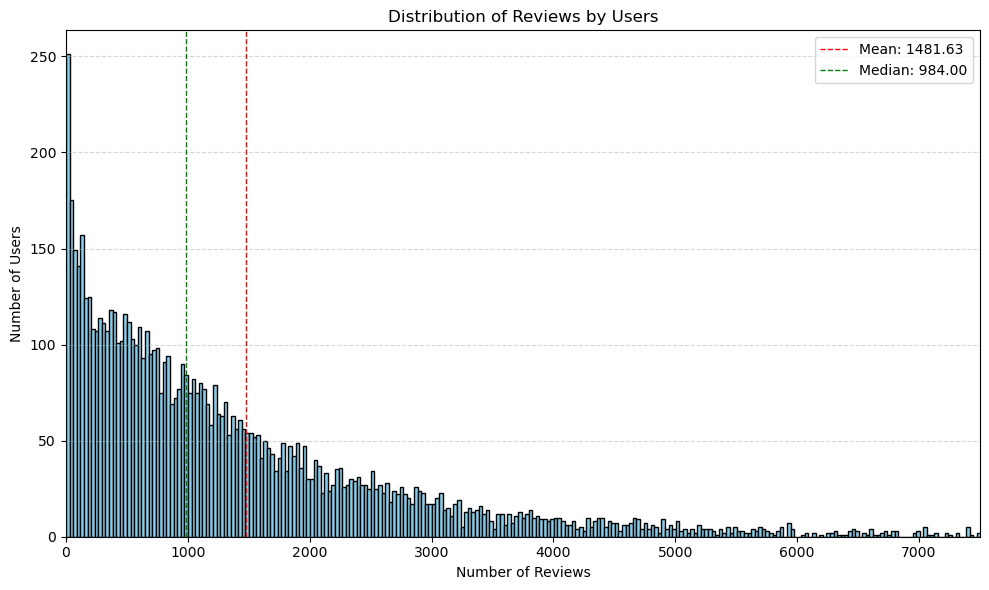

In [123]:
# Counting the number of reviews per user by grouping
reviews_per_user = ratings.groupby('user_id').size()

# Calculate mean and median reviews per user
mean_reviews = reviews_per_user.mean()
median_reviews = reviews_per_user.median()

# Plotting the distribution of reviews by users
plt.figure(figsize=(10, 6))
plt.hist(reviews_per_user, bins=3000, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews by Users')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 7500)  # Limiting x-axis to focus on majority of users
plt.tight_layout()

# Add mean and median to the plot
plt.axvline(mean_reviews, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_reviews:.2f}')
plt.axvline(median_reviews, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_reviews:.2f}')
plt.legend()

plt.show()

In [124]:
ratings.sample(10)

,_id,movie_id,rating_val,user_id
9371332,6175e653b2ba1084669218df,butch-cassidy-and-the-sundance-kid,8,barrylyndon1975
2964208,5fc5a0146758f696343f5872,captain-america-the-winter-soldier,7,kerrymaxwell
5820433,5fc68b006758f696341d62ab,acolytes,6,themoviewaffler
3962950,5fc5abca6758f6963491fc72,legally-blonde,8,andresgarcia102
3944016,5fc5ab936758f69634901aaf,dr-strangelove-or-how-i-learned-to-stop-worryi...,9,troublenomore
1658834,5fc58fb26758f69634d5ef00,universal-soldier-regeneration,6,ohughes86
19169,5fc57cc26758f69634549ff7,the-report-2019,8,ianamurray
4211692,5fc5aedd6758f69634a72c1d,o-bom-burgues,6,andersoncaco
6442798,5fc6a7f86758f69634b30343,the-good-the-bad-and-the-ugly,9,austinh
4987851,5fc5b7726758f69634e8a5aa,twin-peaks-fire-walk-with-me,10,officialufos


Lets check for nulls within our taings data

In [125]:
ratings.isnull().sum()

_id           0
movie_id      6
rating_val    0
user_id       0
dtype: int64

In [126]:
ratings.isnull().sum() / ratings.shape[0]

_id           0.000000e+00
movie_id      5.416058e-07
rating_val    0.000000e+00
user_id       0.000000e+00
dtype: float64

We have a very negligible amount of nulls and they are all within our movie_id column. Lets take a quick peak at what the rows look like before we drop them.

In [127]:
ratings[ratings['movie_id'].isnull()]

,_id,movie_id,rating_val,user_id
6766340,5fd05e0ab89a841f5b224790,NaN,6,ghettominibar
6783993,5fd070c6b89a841f5b22a472,NaN,10,lancelubelski
6785171,5fd072a5b89a841f5b22acb6,NaN,6,deepbluefunk
7070391,600c858fba1595b3679dacd2,NaN,5,welovemovies
7306719,6088259e28f29d0115e0c920,NaN,7,ghettominibar
8492587,60fc5207d72bb4dd0a693e08,NaN,5,acervofilmico


We will go ahead and drop these.

In [128]:
# Drop rows where 'movie_id' column has null values in place
ratings.dropna(subset=['movie_id'], inplace=True)

In [129]:
#Sanity Check
ratings.shape

(11078161, 4)

This is 6 rows less than our old dataframe, as we expected.

In [130]:
#Sanity Check
ratings.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof


Looks all good here. 

Lets look at look at Raiders of the lost ark, see how many reviews we have and determine if we can merge this information onto our movies data. 

In [131]:
ratings.loc[ratings['movie_id']=="raiders-of-the-lost-ark"]

,_id,movie_id,rating_val,user_id
2334,5fc57c926758f6963453138a,raiders-of-the-lost-ark,10,kurstboy
2340,5fc57c966758f6963453354d,raiders-of-the-lost-ark,8,davidehrlich
11798,5fc57cad6758f6963453f754,raiders-of-the-lost-ark,9,jay
12029,5fc57cb26758f696345415c4,raiders-of-the-lost-ark,9,superpulse
21367,5fc57cc26758f6963454ae97,raiders-of-the-lost-ark,8,ianamurray
...,...,...,...,...
11041613,6239dd5aa936b95600a99f0a,raiders-of-the-lost-ark,8,anjyfox
11043503,6239dddaa936b95600a9decc,raiders-of-the-lost-ark,10,sheldond
11065595,6239e3b5a936b95600ad1a59,raiders-of-the-lost-ark,8,jacfer
11072216,6239e55ba936b95600ae25de,raiders-of-the-lost-ark,8,poellnerson


we can see we have 3908 reviews for Raiders of the Lost Arc. Lets look to see if we can pair raiders-of-the-lost-ark with our movies data set on movie_id (We were told on kaggle that we could merge using this column).

In [132]:
movies.loc[movies['movie_id']=="raiders-of-the-lost-ark"]

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
3713,5fc86a4c6758f6963478d502,"[""Adventure"",""Action""]",sm/upload/oz/di/0n/js/mkDExQxNWZug5T9dtVdng7ou...,tt0082971,http://www.imdb.com/title/tt0082971/maindetails,raiders-of-the-lost-ark,Raiders of the Lost Ark,en,When Dr. Indiana Jones – the tweed-suited prof...,30.782,"[""United States of America""]",1981-06-12,115.0,"[""English"",""Español"",""Deutsch"",""עִבְרִית"",""الع...",85.0,https://www.themoviedb.org/movie/85/,7.9,9581.0,1981.0


Perfect! As our data set indicated to us on Kaggle, we can join our tables on movie_id.

#### Ratings Feature Engineering & EDA contd.
Before we join ratings on movies lets calculate a new dataframe that will hold the average rating for each movie within our ratings data, as well as do a count of how many ratings it has.

In [133]:
# Calculate average rating and count of ratings per movie
movie_ratings_summary = ratings.groupby('movie_id')['rating_val'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
movie_ratings_summary.columns = ['movie_id', 'avg_rating', 'rating_count']


In [134]:
movie_ratings_summary.shape

(286070, 3)

From our approximately 11 million reviews, we have a total of 286070 unique movies.

In [135]:
movie_ratings_summary.sample(20)

,movie_id,avg_rating,rating_count
226346,the-end-2016-5,7.000000,1
13370,ali-baba-e-os-quarenta-ladroes,6.000000,5
60287,derborence,6.000000,1
29211,best-possible-taste-the-kenny-everett-story,7.000000,3
238867,the-man-from-outer-space,1.000000,1
33875,blue-fin,7.000000,1
205273,sss,7.500000,2
16165,americans-in-bed,5.875000,8
30149,biday-byomkesh,4.000000,1
125914,labyrinth-tale,6.428571,28


Lets check out what our 20 most rated movies within our dataset are:

In [136]:
#20 most rated movies by rating count
top_20_reviewed = movie_ratings_summary.sort_values(by='rating_count', ascending=False).head(20)

top_20_reviewed

,movie_id,avg_rating,rating_count
169341,parasite-2019,9.162221,5998
122544,knives-out-2019,7.996258,5612
90083,get-out-2017,8.299057,5514
116919,joker-2019,6.600256,5466
164285,once-upon-a-time-in-hollywood,7.760165,5337
204393,spider-man-into-the-spider-verse,8.669187,5290
23929,baby-driver,7.608329,5211
20785,arrival-2016,8.294613,5105
249041,the-shining,8.878580,5098
126079,lady-bird,8.114667,5093


Interesting! Parasite is the most reviewed movie within our dataset and also appears to be our highest rated movie within the top 20. Lets look at the top 20 most rated movies ranked by rating on a plot:

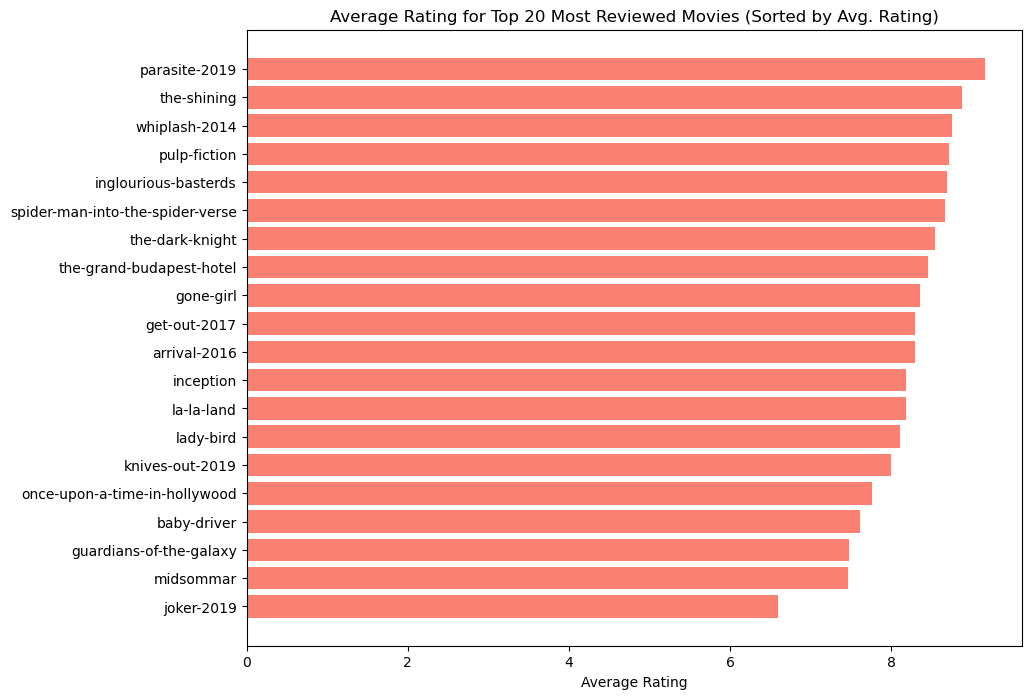

In [137]:
# Sorting top 20 most reviewed movies by average rating
top_20_reviewed = top_20_reviewed.sort_values(by='avg_rating', ascending=True) 

# Creating a horizontal bar plot for average ratings with sorted values
plt.figure(figsize=(10, 8))
plt.barh(top_20_reviewed['movie_id'], top_20_reviewed['avg_rating'], color='salmon')
plt.xlabel('Average Rating')
plt.title('Average Rating for Top 20 Most Reviewed Movies (Sorted by Avg. Rating)')
plt.show()

Out of the most reviews movies, the highest average rated are Parasite, The Shining, and Whiplash.

Lets look at some basic statistical analysis of our data to see what its like. We will use this to help us decide a threshold for minimum movie reviews and scores going forward.

In [138]:
movie_ratings_summary.describe()

,avg_rating,rating_count
count,286070.000000,286070.000000
mean,5.643809,38.725350
std,1.671065,215.272529
min,1.000000,1.000000
25%,4.750000,1.000000
50%,6.000000,3.000000
75%,6.894737,9.000000
max,10.000000,5998.000000


#### Movie Rating Summary Insights
* We have 286,070 movies within this dataframe
* We will determine a minimum rating_count and avg_rating to apply to our data so we can reduce this number drastically, and only work with more relevant movies
* We can see our rating_count data is quite skewed left with a mean of 38.7 buta 75th percintile of 9
    * The count of ratings per movie has a large standard deviation, indicating a wide variation in the number of ratings received by each movie. Some movies have significantly more ratings compared to others.
* The ratings seem to be somewhat positively skewed, with a higher mean and median than the lower quartile.


Lets look at the distribution of ratings per movie:

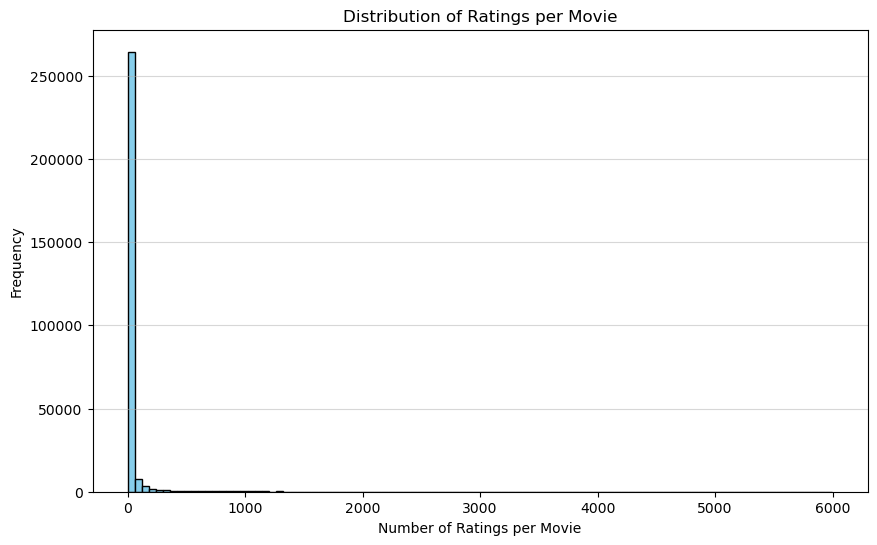

In [139]:
# Plotting a histogram for the distribution of ratings per movie
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings_summary['rating_count'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per Movie')
plt.grid(axis='y', alpha=0.5)
plt.show()

We have very skewed data here the majority of our movies have less than about 300 reviews. Remember our movies had a mean rating count of 38, but a 75th percentile of  Lets check how many movies we have with more than 500 ratings:

In [140]:
#movies with 500 or more ratings
movie_ratings_summary.loc[movie_ratings_summary['rating_count'] >= 500]

,movie_id,avg_rating,rating_count
144,10-cloverfield-lane,7.385838,3587
189,10-things-i-hate-about-you,7.443325,2779
322,10000-bc,3.038869,566
355,101-dalmatians,4.893564,1212
459,12-angry-men,9.188402,3604
...,...,...,...
285789,zombieland-double-tap,5.837910,2258
285897,zookeeper,3.056662,653
285900,zoolander,6.315075,2136
285901,zoolander-2,3.523902,1025


If we set 500 as our ratings threshold we would have 4900 movies remaining in our data set. Lets check about setting our threshold a little bit lower.

In [141]:
#movies with 150 or more ratings
ratings_movie_min150 = movie_ratings_summary.loc[movie_ratings_summary['rating_count'] >= 150]

ratings_movie_min150

,movie_id,avg_rating,rating_count
66,1-2013-1,5.388298,188
124,10,6.010256,195
144,10-cloverfield-lane,7.385838,3587
182,10-rillington-place,7.667883,274
189,10-things-i-hate-about-you,7.443325,2779
...,...,...,...
285904,zoom,2.929664,327
285928,zootopia,7.286927,3886
285971,zu-warriors-from-the-magic-mountain,7.483871,155
285992,zulu,7.143791,306


By setting our threshold to 150 reviews we get just over 12k movies. This is good for now. Lets see our distribution of rating scores now:

First we will do so for ratings before we set our minimum rating threshold, and then we will do it after.

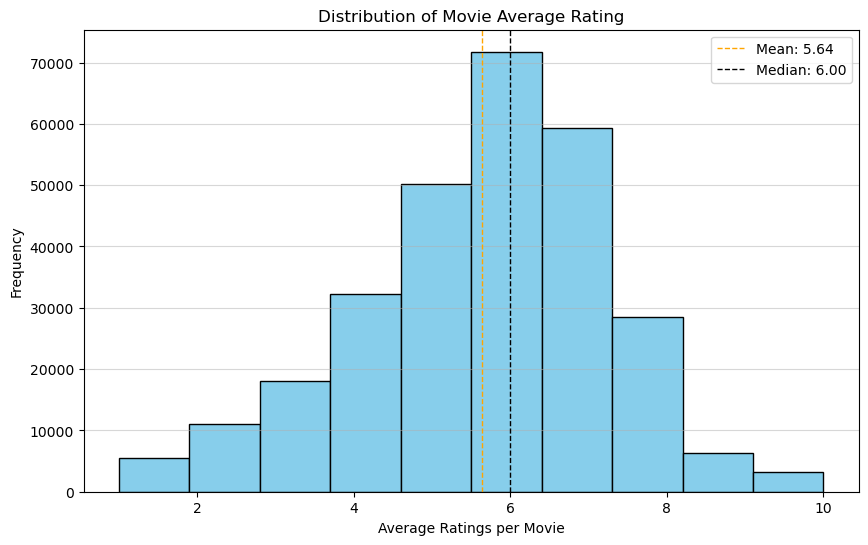

In [142]:
# Plotting a histogram for the distribution of ratings per movie
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings_summary['avg_rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Average Ratings per Movie')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Average Rating')
plt.grid(axis='y', alpha=0.5)

# Calculating mean and median of average ratings
mean_rating = np.mean(movie_ratings_summary['avg_rating'])
median_rating = np.median(movie_ratings_summary['avg_rating'])

# Adding mean and median lines to the plot
plt.axvline(mean_rating, color='orange', linestyle='dashed', linewidth=1, label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='black', linestyle='dashed', linewidth=1, label=f'Median: {median_rating:.2f}')
plt.legend()

plt.show()

For our ratings summary dataframe before thefreshold we have a pretty normal distribution with a mean rating of 5.64 and a median of 6.0. 

**Note:** That the mean and average here are calculated from movies average rating and do no take into account the total number of ratings.

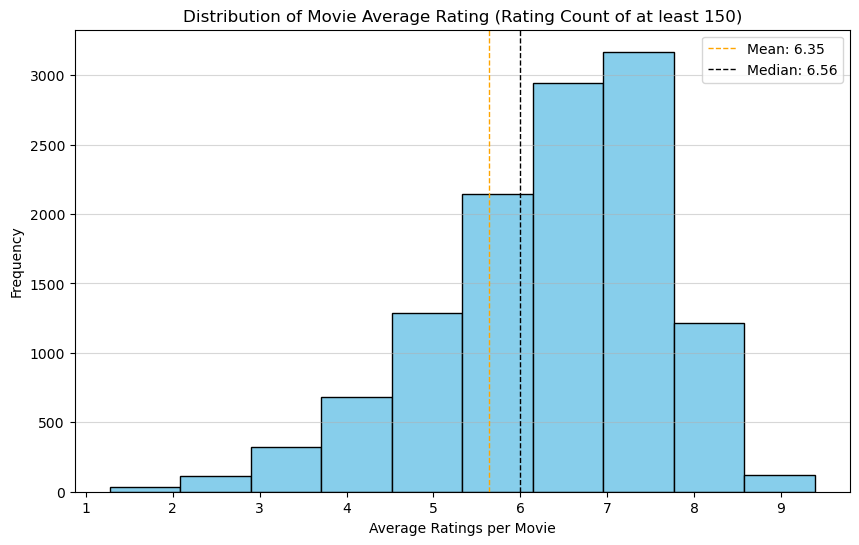

In [143]:
# Plotting a histogram for the distribution of ratings per movie
plt.figure(figsize=(10, 6))
plt.hist(ratings_movie_min150['avg_rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Average Ratings per Movie')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Average Rating (Rating Count of at least 150)')
plt.grid(axis='y', alpha=0.5)

# Calculating mean and median of average ratings
mean_rating_150 = np.mean(ratings_movie_min150['avg_rating'])
median_rating_150 = np.median(ratings_movie_min150['avg_rating'])

# Adding mean and median lines to the plot
plt.axvline(mean_rating, color='orange', linestyle='dashed', linewidth=1, label=f'Mean: {mean_rating_150:.2f}')
plt.axvline(median_rating, color='black', linestyle='dashed', linewidth=1, label=f'Median: {median_rating_150:.2f}')
plt.legend()

plt.show()

Our movies with at least 150 ratings are have a little bit more of a left skew for average movie rating. 
* Mean of 6.35
* Median of 6.56
Both of these numbers are higher than our orinal ratings summary table.

The average number is lower than I expected, lets see how many movies above a rating of 7 we have.

In [144]:
#Number of movies with a rating greater than 7
ratings_movie_min150.loc[ratings_movie_min150['avg_rating'] >= 7]

,movie_id,avg_rating,rating_count
144,10-cloverfield-lane,7.385838,3587
182,10-rillington-place,7.667883,274
189,10-things-i-hate-about-you,7.443325,2779
397,11-22-63,7.451807,332
459,12-angry-men,9.188402,3604
...,...,...,...
285613,zodiac,8.406332,4580
285724,zombie-flesh-eaters,7.385744,954
285928,zootopia,7.286927,3886
285971,zu-warriors-from-the-magic-mountain,7.483871,155


Only 4302 movies hav a an average score of greater than 7.

In [145]:
#Number of movies with a rating greater than 8
ratings_movie_min150.loc[ratings_movie_min150['avg_rating'] >= 8]

,movie_id,avg_rating,rating_count
459,12-angry-men,9.188402,3604
518,12-years-a-slave,8.245345,3061
635,13th,8.074008,1689
1162,2001-a-space-odyssey,8.931693,4187
1322,20th-century-women,8.019155,2297
...,...,...,...
283717,yi-yi,8.828756,1238
283857,yojimbo,8.367674,1621
284652,your-name,8.001152,2605
285038,z,8.278846,624


Only a measely 861 movies have a rating greater than 8! Tough crowd...

## Users Data
The users data set gives us information on the reviewer which will be important for us to approach collaborative filtering in the future. For Sprint 2 I will be conducting a Nearest Neighbours model that will be content-based filtering. My hope for my final version of my proejct is to have collaborative filtereing included. We will save this data set until that point.

We have the data of **8139 users** which should be sufficient in us noticing trends in users preferances and allow us to make legimate suggestions. 

In [146]:
users.shape

(8139, 5)

In [147]:
users.head()

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy


## Creating Dataframe for Pre-Processing
Now that we have gone through our three datasets Movies, Ratings, and Users. We are going to merge our engineered dataframe ratings_movie_min150 onto our movies data using user_id.

In [148]:
#Lets see how many rows and columns we have before we merge
movies_clean.shape

(251137, 11)

In [149]:
movies_clean.head()

,_id,genres,movie_id,original_language,overview,popularity,release_date,runtime,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",football-freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,1971-12-05,0.0,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],aftermath-1960,en,Aftermath was the pilot for an unsold TV serie...,0.600,1960-04-17,22.0,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",where-chimneys-are-seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,1953-03-05,108.0,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",the-musicians-daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,1911-12-12,15.0,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",50-years-of-fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,2018-05-17,75.0,0.0,0.0,2018.0


In [150]:
ratings_movie_min150.shape

(12040, 3)

In [151]:
ratings_movie_min150.head()

,movie_id,avg_rating,rating_count
66,1-2013-1,5.388298,188
124,10,6.010256,195
144,10-cloverfield-lane,7.385838,3587
182,10-rillington-place,7.667883,274
189,10-things-i-hate-about-you,7.443325,2779


We have 251,137 rows and 11 features for our movies dataset. We have 12,040 row and 3 features in our adjusted ratings dataset. We will expect to have 13 features and however many rows match with movie_id. It should be close to 12040 We will proceed to drop all movies that dont match afterwards.

**Note:** We dropped movies from our movie dataframe that did not have a overview. We will likely lose some rows there.

In [152]:
#Inner-Join the moin the movies and the customer ratings table on table_id
df = pd.merge(movies_clean, ratings_movie_min150, on='movie_id', how = 'inner')

In [153]:
df

,_id,genres,movie_id,original_language,overview,popularity,release_date,runtime,vote_average,vote_count,year_released,avg_rating,rating_count
0,5fc85ff26758f696344acf62,"[""Drama"",""Thriller""]",a-deadly-adoption,en,Things go awry when an author and his wife wel...,5.060,2015-06-20,90.0,5.0,68.0,2015.0,5.388889,162
1,5fc85ff26758f696344acf9b,"[""Animation"",""Comedy""]",lily-and-jim,en,Lily and Jim are interviewed about their disas...,1.748,1997-01-01,13.0,6.6,40.0,1997.0,6.875000,192
2,5fc85ff26758f696344ad0b1,"[""Action"",""Comedy"",""Thriller"",""Romance""]",killers-2010,en,When an elite assassin marries a beautiful com...,22.918,2010-06-04,100.0,5.9,1819.0,2010.0,3.565934,364
3,5fc85ff26758f696344acdf6,"[""Drama""]",in-the-shadow-of-women,fr,Pierre and Manon are poor. They make documenta...,2.636,2015-05-14,73.0,6.0,37.0,2015.0,6.686667,150
4,5fc85ff26758f696344ace91,"[""Drama"",""Action"",""Comedy"",""Crime""]",the-pope-of-greenwich-village,en,Charlie and his troublesome cousin Paulie deci...,5.630,1984-06-22,121.0,6.5,91.0,1984.0,6.601227,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11796,61ccb7590109cc2a5d628e1d,"[""Drama"",""Science Fiction""]",ex-machina-2015,en,"Caleb, a coder at the world's largest internet...",26.475,2015-01-21,108.0,7.6,10829.0,2015.0,7.990072,3324
11797,61d1a62f0109cc2a5d822905,"[""War"",""Drama"",""History"",""Romance""]",war-and-peace-1965,ru,A seven-hour epic adaptation of the novel by L...,10.173,1966-03-14,422.0,7.7,72.0,1965.0,8.727273,176
11798,61d1aad90109cc2a5d83d806,"[""Documentary""]",harry-potter-20th-anniversary-return-to-hogwarts,en,An enchanting making-of story told through all...,583.354,2022-01-01,103.0,8.3,840.0,2022.0,7.605364,522
11799,61dd43eb0109cc2a5d12ee62,"[""Comedy"",""Horror""]",house-1985,en,Roger Cobb is an author who has just separated...,12.058,1985-02-28,93.0,6.1,391.0,1985.0,6.154905,581


Excellent, we have 11,801 rows. This is a good chunk of our data. Lets see what percentage we matched.

In [154]:
#Perfecent of rows from our ratings table successfully joined
df.shape[0] / ratings_movie_min150.shape[0]

0.9801495016611296

98% - we are happy with that. We do have some potentially correlated data here:
* vote_average, vote_count came as part of our movie dataset but actually use values from "The Movie Database" that were added on by the creator of our dataset.	
* avg_rating,rating_count are calcuated by us from within our data set. Lets check out a numerical correlation matrix

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11801 entries, 0 to 11800
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                11801 non-null  object 
 1   genres             11801 non-null  object 
 2   movie_id           11801 non-null  object 
 3   original_language  11801 non-null  object 
 4   overview           11801 non-null  object 
 5   popularity         11801 non-null  float64
 6   release_date       11801 non-null  object 
 7   runtime            11801 non-null  float64
 8   vote_average       11801 non-null  float64
 9   vote_count         11801 non-null  float64
 10  year_released      11801 non-null  float64
 11  avg_rating         11801 non-null  float64
 12  rating_count       11801 non-null  int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 1.2+ MB


In [156]:
# Select numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

               popularity   runtime  vote_average  vote_count  year_released  \
popularity       1.000000  0.046998      0.048903    0.148396       0.114867   
runtime          0.046998  1.000000      0.165877    0.209411       0.113465   
vote_average     0.048903  0.165877      1.000000    0.206019      -0.161223   
vote_count       0.148396  0.209411      0.206019    1.000000       0.192724   
year_released    0.114867  0.113465     -0.161223    0.192724       1.000000   
avg_rating      -0.071232  0.103481      0.662803    0.002401      -0.340289   
rating_count     0.152514  0.198060      0.270719    0.788603       0.151684   

               avg_rating  rating_count  
popularity      -0.071232      0.152514  
runtime          0.103481      0.198060  
vote_average     0.662803      0.270719  
vote_count       0.002401      0.788603  
year_released   -0.340289      0.151684  
avg_rating       1.000000      0.226370  
rating_count     0.226370      1.000000  


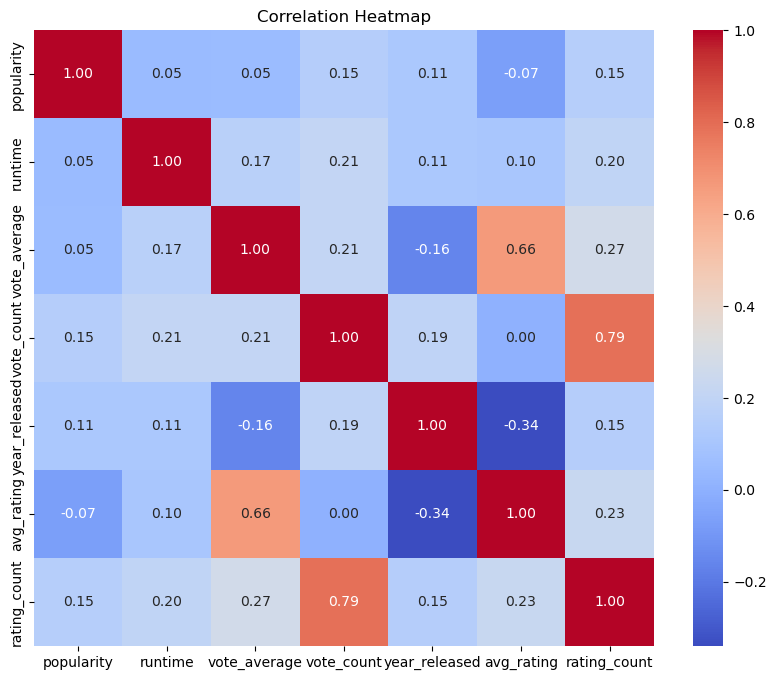

In [157]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Correlation Insights
We can see that they do infact have a high correlation.
* Vote_Average (TMDB) and Avg_rating (Our data) have a 0.66 correlation
* Vote_Count (TMDB) and Rating_Count have a 0.79 correlation
* Our other features look relatively uncorrelated.

We will go ahead and drop the Vote_Average and Vote_Count from our dataframe.

In [158]:
# Drop 'vote_average' and 'vote_count' columns
df.drop(columns=['vote_average', 'vote_count'], inplace=True)

Lets also drop the release date, as it was not included in the correlation matric but qualititavely we know it will be correlated with year_released.

In [159]:
#Drop 'relase_date'
df.drop(columns=['release_date'], inplace=True)

In [160]:
#Sanity Check
df.head()

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count
0,5fc85ff26758f696344acf62,"[""Drama"",""Thriller""]",a-deadly-adoption,en,Things go awry when an author and his wife wel...,5.060,90.0,2015.0,5.388889,162
1,5fc85ff26758f696344acf9b,"[""Animation"",""Comedy""]",lily-and-jim,en,Lily and Jim are interviewed about their disas...,1.748,13.0,1997.0,6.875000,192
2,5fc85ff26758f696344ad0b1,"[""Action"",""Comedy"",""Thriller"",""Romance""]",killers-2010,en,When an elite assassin marries a beautiful com...,22.918,100.0,2010.0,3.565934,364
3,5fc85ff26758f696344acdf6,"[""Drama""]",in-the-shadow-of-women,fr,Pierre and Manon are poor. They make documenta...,2.636,73.0,2015.0,6.686667,150
4,5fc85ff26758f696344ace91,"[""Drama"",""Action"",""Comedy"",""Crime""]",the-pope-of-greenwich-village,en,Charlie and his troublesome cousin Paulie deci...,5.630,121.0,1984.0,6.601227,163


## Final Dataframe
I am happy with our dataframe now. Lets save it as a csv.

In [161]:
# Save the DataFrame to a CSV file
df.to_csv('letterboxd_data.csv', index=False)


Lets make a data dictionary now that this is semi-finalized.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11801 entries, 0 to 11800
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                11801 non-null  object 
 1   genres             11801 non-null  object 
 2   movie_id           11801 non-null  object 
 3   original_language  11801 non-null  object 
 4   overview           11801 non-null  object 
 5   popularity         11801 non-null  float64
 6   runtime            11801 non-null  float64
 7   year_released      11801 non-null  float64
 8   avg_rating         11801 non-null  float64
 9   rating_count       11801 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 922.1+ KB


## Data Dictionary
| Column             | Data Type   | Non-Null Count | Description                                           |
|--------------------|-------------|----------------|-------------------------------------------------------|
| _id                | Object      | 11801          | Global unique ID for the movie                        |
| genres             | Object      | 11801          | Array of associated movie genres                      |
| movie_id           | Object      | 11801          | Letterboxd movie ID                                   |
| original_language  | Object      | 11801          | Original language of the movie (from TMDB)             |
| overview           | Object      | 11801          | Description of the movie (from TMDB)                  |
| popularity         | Float64     | 11801          | Numeric popularity score of the movie (from TMDB)      |
| runtime            | Float64     | 11801          | Duration of the movie in minutes                      |
| year_released      | Float64     | 11801          | Year when the movie was released                      |
| avg_rating         | Float64     | 11801          | Average rating for this movie within the dataset      |
| rating_count       | Int64       | 11801          | Number of ratings for a particular movie within this dataset |

# Pre-Processing & Vectorization

Based on the data we have currently we are going to need to leverage our overview column. We will vectorize it and prepare to test for similarity between movies based on their description.

In [163]:
df.head(1)

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count
0,5fc85ff26758f696344acf62,"[""Drama"",""Thriller""]",a-deadly-adoption,en,Things go awry when an author and his wife wel...,5.06,90.0,2015.0,5.388889,162


We will need to convert all of our columns we want to use to numeric in order to prepare for modelling.

##### Overview
We will use TF_IDF Vecortizer as it does a good job handling common word occurences and more unique occurances simultanesously. 

Note: We know we already dropped all the nulls within the overview column.

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Instantiate our TF_IDF vectorizer
# Setting default stop words to english
# Max features will cap the number of tokens at 500
# Min DF will ensuare the word occurs at least twice to be brought into consideration
vectorizer = TfidfVectorizer(stop_words = "english", max_features=500,min_df=2) 

#Fit and transform our vectorizer on our overview column, assigning it as a sparse matrix
TF_IDF_matrix = vectorizer.fit_transform(df['overview'])

Now we have instantiated our TD IDF vectorizer. I decided to set max_features to 500 for the time being to simplify processing and save some computing time. Past sprint 3 I may consider moving this value higher to be more all considering.

In [165]:
TF_IDF_matrix.shape

(11801, 500)

In [166]:
#Lets check it out for Raiders of the lost Arc
TF_IDF_matrix[(df['movie_id'] == 'raiders-of-the-lost-ark').values].todense().squeeze()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

Lets take a look at our most common words within movie description.

**Note:** We added stopwords default groupd "english" already

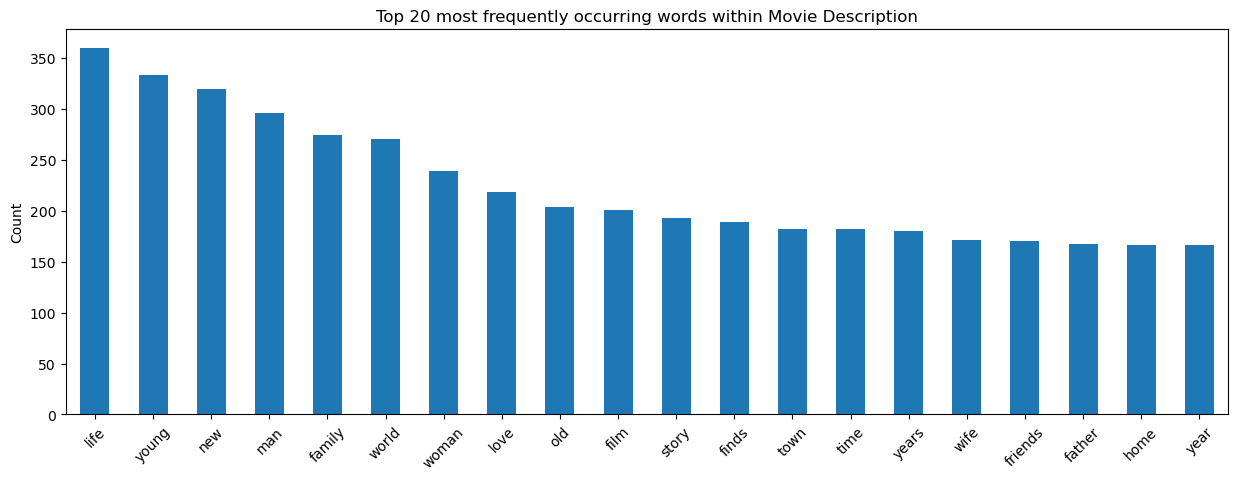

In [167]:
word_counts = pd.DataFrame(
    {"counts": TF_IDF_matrix.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words within Movie Description")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Now that we have our first run at our TF IDF Vectorized data, lets calculate cosine similarity.

We will look once again at Raiders of the Lost Arc and since we know (from extensive bakground research) that it is a Indiana Jones movie, let compare it to another Indy movie.


In [168]:
df.loc[df['movie_id']=='raiders-of-the-lost-ark']

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count
194,5fc86a4c6758f6963478d502,"[""Adventure"",""Action""]",raiders-of-the-lost-ark,en,When Dr. Indiana Jones – the tweed-suited prof...,30.782,115.0,1981.0,8.481832,3908


In [169]:
#Looking for another Indiana Jones movie
df[df['movie_id'].str.contains('indiana-jones', na=False)]

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count
2836,5fc8721c6758f696349b5400,"[""Adventure"",""Action""]",indiana-jones-and-the-temple-of-doom,en,"After arriving in India, Indiana Jones is aske...",24.882,118.0,1984.0,7.048237,3006
5376,5fc877f76758f69634b57588,"[""Adventure"",""Action""]",indiana-jones-and-the-kingdom-of-the-crystal-s...,en,"Set during the Cold War, the Soviets—led by sw...",23.291,122.0,2008.0,4.994582,2584
10284,5fc883786758f69634f03a12,"[""Adventure"",""Action""]",indiana-jones-and-the-last-crusade,en,When Dr. Henry Jones Sr. suddenly goes missing...,24.824,127.0,1989.0,8.033586,3037


Lets check the similarity between two here. Note that a score of +1 indicates perfect similarity, -1 perfect dissimilarity, and 0 Orthoganility (no similarity).

In [170]:
from sklearn.metrics.pairwise import cosine_similarity

movie_1 = TF_IDF_matrix[(df['movie_id'] == 'raiders-of-the-lost-ark').values,]
movie_2 = TF_IDF_matrix[(df['movie_id'] == 'indiana-jones-and-the-last-crusade').values,]

print("Similarity:", cosine_similarity(movie_1, movie_2)) 

Similarity: [[0.11733971]]


A score of 0.1173 is lower than we might like, but there is certainly some positive similarity there. It can be noted that we only did a first pass at vectorization. We can revisit this later and potentially improve this.

Now lets compute the similarity between each column and every other column, giving back a square matrix, aka like a correlation matrix for features.

In [171]:
from sklearn.metrics.pairwise import cosine_similarity 

#Creating our square matrix for similarity
similarities = cosine_similarity(TF_IDF_matrix, dense_output=False)

In [172]:
# Check the shape
# rows and columns should be equal, and the number of movies we started with (rows)
similarities.shape

(11801, 11801)

In [173]:
#The number of movies we started with
df.shape[0]

11801

Perfect!

In [174]:
similarities

<11801x11801 sparse matrix of type '<class 'numpy.float64'>'
	with 30352693 stored elements in Compressed Sparse Row format>

Wow our similarities Sparse matrix contains 30,352,693 elements. 

Lets work with Raiders of the Lost Ark again and take its column in the similarity matrix, and then finding those rows where the similarities are highest, return the 10 most similar movies.

In [175]:
# Get the column based upon the index
movie_index = df[df['movie_id'] == 'raiders-of-the-lost-ark'].index

# Create a dataframe with the movie titles
sim_df = pd.DataFrame({'movie':df['movie_id'], 
                       'similarity': np.array(similarities[movie_index, :].todense()).squeeze()})

In [176]:
# Return the top 10 most similar movies
sim_df.sort_values(by='similarity', ascending=False).head(10)

,movie,similarity
194,raiders-of-the-lost-ark,1.000000
2129,operation-condor,0.389833
5670,the-man-who-knew-infinity,0.387868
894,the-testament-of-dr-mabuse,0.348343
10087,a-serious-man,0.329903
6080,hands-of-stone,0.318986
4316,the-adventures-of-pluto-nash,0.296280
1673,pawn-sacrifice,0.293033
9349,murder-my-sweet,0.289673
8078,the-revenge-of-frankenstein,0.284640


This is doing an okay job at suggesting movies, we don't see other indiana jones movies which is not the greatest sign. However, we are **only** using description column. I think using the genre coumn would be greatly beneficial as well.

In order to use more columns we will turn our sparse matrix into a dataframe and merge it onto our existing dataframe.

In [179]:
# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(TF_IDF_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Reset the index of the movie_df for concatenation
df.reset_index(drop=True, inplace=True)

# Concatenate the original dataset (movie_df) and the TF-IDF matrix DataFrame (tfidf_df)
merged_df = pd.concat([df, tfidf_df], axis=1)

In [181]:
merged_df

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,...,working,works,world,writer,wrong,year,years,york,young,younger
0,5fc85ff26758f696344acf62,"[""Drama"",""Thriller""]",a-deadly-adoption,en,Things go awry when an author and his wife wel...,5.060,90.0,2015.0,5.388889,162,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,5fc85ff26758f696344acf9b,"[""Animation"",""Comedy""]",lily-and-jim,en,Lily and Jim are interviewed about their disas...,1.748,13.0,1997.0,6.875000,192,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,5fc85ff26758f696344ad0b1,"[""Action"",""Comedy"",""Thriller"",""Romance""]",killers-2010,en,When an elite assassin marries a beautiful com...,22.918,100.0,2010.0,3.565934,364,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,5fc85ff26758f696344acdf6,"[""Drama""]",in-the-shadow-of-women,fr,Pierre and Manon are poor. They make documenta...,2.636,73.0,2015.0,6.686667,150,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.273670,0.0
4,5fc85ff26758f696344ace91,"[""Drama"",""Action"",""Comedy"",""Crime""]",the-pope-of-greenwich-village,en,Charlie and his troublesome cousin Paulie deci...,5.630,121.0,1984.0,6.601227,163,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.259337,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11796,61ccb7590109cc2a5d628e1d,"[""Drama"",""Science Fiction""]",ex-machina-2015,en,"Caleb, a coder at the world's largest internet...",26.475,108.0,2015.0,7.990072,3324,...,0.0,0.0,0.345781,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
11797,61d1a62f0109cc2a5d822905,"[""War"",""Drama"",""History"",""Romance""]",war-and-peace-1965,ru,A seven-hour epic adaptation of the novel by L...,10.173,422.0,1965.0,8.727273,176,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.254616,0.0
11798,61d1aad90109cc2a5d83d806,"[""Documentary""]",harry-potter-20th-anniversary-return-to-hogwarts,en,An enchanting making-of story told through all...,583.354,103.0,2022.0,7.605364,522,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
11799,61dd43eb0109cc2a5d12ee62,"[""Comedy"",""Horror""]",house-1985,en,Roger Cobb is an author who has just separated...,12.058,93.0,1985.0,6.154905,581,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


##### Genres
We will use Sk Learn's MultiLabelBinarizer to transform the genres into a multi-binary representation of our genre column.

In [182]:
#Creating a new version of our df to save our progress
movie_df = merged_df.copy()


In [183]:
movie_df.head()

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,...,working,works,world,writer,wrong,year,years,york,young,younger
0,5fc85ff26758f696344acf62,"[""Drama"",""Thriller""]",a-deadly-adoption,en,Things go awry when an author and his wife wel...,5.060,90.0,2015.0,5.388889,162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
1,5fc85ff26758f696344acf9b,"[""Animation"",""Comedy""]",lily-and-jim,en,Lily and Jim are interviewed about their disas...,1.748,13.0,1997.0,6.875000,192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
2,5fc85ff26758f696344ad0b1,"[""Action"",""Comedy"",""Thriller"",""Romance""]",killers-2010,en,When an elite assassin marries a beautiful com...,22.918,100.0,2010.0,3.565934,364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
3,5fc85ff26758f696344acdf6,"[""Drama""]",in-the-shadow-of-women,fr,Pierre and Manon are poor. They make documenta...,2.636,73.0,2015.0,6.686667,150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.27367,0.0
4,5fc85ff26758f696344ace91,"[""Drama"",""Action"",""Comedy"",""Crime""]",the-pope-of-greenwich-village,en,Charlie and his troublesome cousin Paulie deci...,5.630,121.0,1984.0,6.601227,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259337,0.00000,0.0


In [184]:
movie_df['genres'].unique()

array(['["Drama","Thriller"]', '["Animation","Comedy"]',
       '["Action","Comedy","Thriller","Romance"]', ...,
       '["Science Fiction","Drama","Adventure"]',
       '["Comedy","Fantasy","Adventure","Science Fiction"]',
       '["Adventure","Animation","Comedy","Family","Fantasy","Music"]'],
      dtype=object)

In [185]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert the genres column from string representation to a list of genres
movie_df['genres'] = movie_df['genres'].apply(eval)  # Convert string representation to list

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform and add new encoded genre columns
encoded_genres = mlb.fit_transform(movie_df['genres'])
encoded_genres_df = pd.DataFrame(encoded_genres, columns=mlb.classes_)

#Sanity Check
encoded_genres_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11796,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
11797,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
11798,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11799,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [186]:
# Concatenate the encoded genres with our dataset
merged_df = pd.concat([merged_df, encoded_genres_df], axis=1)

In [187]:
#Sanity Check
merged_df.head()

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,5fc85ff26758f696344acf62,"[""Drama"",""Thriller""]",a-deadly-adoption,en,Things go awry when an author and his wife wel...,5.060,90.0,2015.0,5.388889,162,...,0,0,0,0,0,0,0,1,0,0
1,5fc85ff26758f696344acf9b,"[""Animation"",""Comedy""]",lily-and-jim,en,Lily and Jim are interviewed about their disas...,1.748,13.0,1997.0,6.875000,192,...,0,0,0,0,0,0,0,0,0,0
2,5fc85ff26758f696344ad0b1,"[""Action"",""Comedy"",""Thriller"",""Romance""]",killers-2010,en,When an elite assassin marries a beautiful com...,22.918,100.0,2010.0,3.565934,364,...,0,0,0,0,1,0,0,1,0,0
3,5fc85ff26758f696344acdf6,"[""Drama""]",in-the-shadow-of-women,fr,Pierre and Manon are poor. They make documenta...,2.636,73.0,2015.0,6.686667,150,...,0,0,0,0,0,0,0,0,0,0
4,5fc85ff26758f696344ace91,"[""Drama"",""Action"",""Comedy"",""Crime""]",the-pope-of-greenwich-village,en,Charlie and his troublesome cousin Paulie deci...,5.630,121.0,1984.0,6.601227,163,...,0,0,0,0,0,0,0,0,0,0


##### Original Language 
As we can see below, we have a lot of language. Probably more than we care to analyze. Lets convert this into a binary. 1 if original language is english, 0 if not.

In [188]:
df['original_language'].unique()

array(['en', 'fr', 'ja', 'hi', 'ko', 'it', 'no', 'es', 'sv', 'zh', 'bn',
       'pt', 'de', 'fi', 'cs', 'cn', 'da', 'pl', 'th', 'ka', 'fa', 'ru',
       'yi', 'bm', 'id', 'xx', 'he', 'uk', 'tl', 'hu', 'nl', 'ca', 'wo',
       'ar', 'el', 'vi', 'sr', 'et', 'is', 'te', 'sh', 'tr', 'ro', 'ml',
       'mr', 'sk', 'hy', 'gl', 'bs', 'sw', 'eu', 'nb', 'af', 'ig'],
      dtype=object)

In [189]:
# Convert 'original_language' column to binary
merged_df['original_language_en'] = merged_df['original_language'].apply(lambda x: 1 if x == 'en' else 0)


In [190]:
merged_df.head(6)

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_en
0,5fc85ff26758f696344acf62,"[""Drama"",""Thriller""]",a-deadly-adoption,en,Things go awry when an author and his wife wel...,5.060,90.0,2015.0,5.388889,162,...,0,0,0,0,0,0,1,0,0,1
1,5fc85ff26758f696344acf9b,"[""Animation"",""Comedy""]",lily-and-jim,en,Lily and Jim are interviewed about their disas...,1.748,13.0,1997.0,6.875000,192,...,0,0,0,0,0,0,0,0,0,1
2,5fc85ff26758f696344ad0b1,"[""Action"",""Comedy"",""Thriller"",""Romance""]",killers-2010,en,When an elite assassin marries a beautiful com...,22.918,100.0,2010.0,3.565934,364,...,0,0,0,1,0,0,1,0,0,1
3,5fc85ff26758f696344acdf6,"[""Drama""]",in-the-shadow-of-women,fr,Pierre and Manon are poor. They make documenta...,2.636,73.0,2015.0,6.686667,150,...,0,0,0,0,0,0,0,0,0,0
4,5fc85ff26758f696344ace91,"[""Drama"",""Action"",""Comedy"",""Crime""]",the-pope-of-greenwich-village,en,Charlie and his troublesome cousin Paulie deci...,5.630,121.0,1984.0,6.601227,163,...,0,0,0,0,0,0,0,0,0,1
5,5fc85ff26758f696344ad01e,"[""Comedy""]",little-sister-2016,en,"October, 2008. Young nun Colleen is avoiding a...",4.519,91.0,2016.0,6.734536,388,...,0,0,0,0,0,0,0,0,0,1


In [191]:
#Checking all columns
pd.set_option('display.max_columns', None) 

merged_df

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_en
0,5fc85ff26758f696344acf62,"[""Drama"",""Thriller""]",a-deadly-adoption,en,Things go awry when an author and his wife wel...,5.060,90.0,2015.0,5.388889,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.501155,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0

In [192]:
#Columns that we will not include in ML
columns_to_drop = ['_id', 'genres', 'original_language','overview']
movies_ML = merged_df.drop(columns = columns_to_drop)

In [193]:
#Sanity Check
movies_ML

,movie_id,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_en
0,a-deadly-adoption,5.060,90.0,2015.0,5.388889,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.501155,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11801 entries, 0 to 11800
Columns: 526 entries, movie_id to original_language_en
dtypes: float64(504), int64(21), object(1)
memory usage: 47.4+ MB


### Pre-Processing Summary
* We applied TF_IDF to our Overview column, finding the top 500 tokens to create binary columns
* Created a binary column for original language whether it is english or not
* Created genre columns creating binary values for each genre, and allowing for multiple genres associated with each movie
* Dropped our old columns from before pre-processing in a datafame that is now ready for our ML model.

# Modelling
Since we are still early in this project and we do not know exactly what we want to predict, we are going to use the Nearest Neighbours model which will allow us to simply identify similar movies (neighbours).

We may evaluate quantitatively but the most powerful evalation right now will be qualitative. When we get to eventually predicting scores for reccomendation we will evaluate using something like Root Mean Square Error.

In [275]:
from sklearn.preprocessing import StandardScaler

X = movies_ML.drop(['movie_id'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Initialize the NearestNeighbors model
#Using euclidian distance as distance metric by default
nn = NearestNeighbors(n_neighbors=10, algorithm='auto')

# Fit the model to your data
nn.fit(X_scaled)

NearestNeighbors(n_neighbors=10)

Okay we have our model, now lets see if its working. We need a query index for a movie. We will keep things consistent and go with Raiders Of the Lost Ark

In [276]:
#find the index 
index_raiders = movies_ML[movies_ML['movie_id'] == 'raiders-of-the-lost-ark'].index

# Display the index
print(index_raiders)

Index([194], dtype='int64')


In [277]:
movies_ML.loc[movies_ML['movie_id']=='raiders-of-the-lost-ark']

,movie_id,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_en
194,raiders-of-the-lost-ark,30.782,115.0,1981.0,8.481832,3908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Lets try this within our model using index for Raiders of the Lost Ark.

In [285]:
# Get the features of Raiders of the Lost Ark movie 
input_movie_features = X_scaled[[194]]  # Assuming the first movie is at index 0

# Find the nearest neighbors
distances, indices = nn.kneighbors(input_movie_features, n_neighbors=10)

# The 'indices' variable contains the indices of the nearest neighbors
# The 'distances' variable contains the distances to these neighbors

# Print the indices and distances of the nearest neighbors
print("Nearest Neighbors Indices:", indices)
print("Euclidian Distance to Neighbors:", distances)

Nearest Neighbors Indices: [[  194 10879  3586  5901   960   231  4692  7372 10753 11022]]
Euclidian Distance to Neighbors: [[ 0.         26.0486469  26.16247054 26.37936778 26.43441606 26.43543296
  26.45164886 26.47092832 26.53181355 26.54028159]]


In [286]:
indices

array([[  194, 10879,  3586,  5901,   960,   231,  4692,  7372, 10753,
        11022]])

In [287]:
movie_df.iloc[indices[0]]

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger
194,5fc86a4c6758f6963478d502,"[Adventure, Action]",raiders-of-the-lost-ark,en,When Dr. Indiana Jones – the tweed-suited prof...,30.782,115.0,1981.0,8.481832,3908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

This seems to be working okay... Hunger Games seems like a reasonably similar Adventure movie. Outside of that we have Dangerous Encounters of the first kind which is an action movie but is in Chinese, headhunters looks like an okay reccomendation but is in Norweigen. We may need to cut down to only english movies. 

Probably the best neighbour when evaluating qualitatively is Hunger Games, as that is Action/Adventure and is also a blockbuster style series film as Indiana Jones.

Nearest neighbours uses euclidian values by default, we cam use these as our sort of "score" for our model. We will re do this model except using cosine similarity as our distance metric next.

In [271]:
eucl_distance_raiders = distances

eucl_distance_raiders

array([[ 0.        , 23.24745363, 30.56819116, 38.73349795, 40.65599319,
        43.05265395, 48.20212048, 53.82683306, 59.04155922, 59.15163124]])

Lets Try Again but with cosine:

In [288]:
from sklearn.preprocessing import StandardScaler

X = movies_ML.drop(['movie_id'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Initialize the NearestNeighbors model
#Using euclidian distance as distance metric by default
nn_cos = NearestNeighbors(n_neighbors=10, algorithm='auto', metric = 'cosine')

# Fit the model to your data
nn_cos.fit(X_scaled)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [291]:
# Get the features of Raiders of the Lost Ark movie 
input_movie_features = X_scaled[[194]]  

# Find the nearest neighbors with new model
distances, indices = nn_cos.kneighbors(input_movie_features, n_neighbors=10)

# The 'indices' variable contains the indices of the nearest neighbors
# The 'distances' variable contains the distances to these neighbors

# Print the indices and distances of the nearest neighbors
print("Nearest Neighbors Indices:", indices)
print("Cosine Similarity to Neighbors:", distances)

Nearest Neighbors Indices: [[  194  2129  4542 11561  6058  5670  8150  5766  2331 10514]]
Cosine Similarity to Neighbors: [[0.         0.57751217 0.58774044 0.63418776 0.6347749  0.63595556
  0.64155381 0.66348821 0.67683049 0.67890717]]


In [292]:
movie_df.iloc[indices[0]]

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger
194,5fc86a4c6758f6963478d502,"[Adventure, Action]",raiders-of-the-lost-ark,en,When Dr. Indiana Jones – the tweed-suited prof...,30.782,115.0,1981.0,8.481832,3908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

This looks like it may be performing better, I see a lot of Action and Adventure movies across the board and our overviews seem to be much more aligned. We have a lot of foreign language movies. Lets check a different movie than raiders of the lost ark.

In [298]:
movie_df.loc[movie_df['movie_id']=='goodfellas']

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger
549,5fc86b116758f696347d9248,"[Drama, Crime]",goodfellas,en,"The true story of Henry Hill, a half-Irish, ha...",28.505,145.0,1990.0,8.858363,4215,0.0,0.0,0.0,0.0,0.0,0.0,0.534284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [299]:
# Get the features of Raiders of the Lost Ark movie 
input_movie_features = X_scaled[[549]]  

# Find the nearest neighbors with new model
distances, indices = nn_cos.kneighbors(input_movie_features, n_neighbors=10)

# The 'indices' variable contains the indices of the nearest neighbors
# The 'distances' variable contains the distances to these neighbors

# Print the indices and distances of the nearest neighbors
print("Nearest Neighbors Indices:", indices)
print("Cosine Similarity to Neighbors:", distances)

Nearest Neighbors Indices: [[  549  3884  9369 10413  1195 11686  1782  5491  4443  4846]]
Cosine Similarity to Neighbors: [[3.33066907e-16 2.24047021e-01 3.89243177e-01 4.63819037e-01
  4.78503454e-01 5.00238924e-01 5.23658126e-01 5.26119967e-01
  5.37075576e-01 5.50994973e-01]]


In [300]:
movie_df.iloc[indices[0]]

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger
549,5fc86b116758f696347d9248,"[Drama, Crime]",goodfellas,en,"The true story of Henry Hill, a half-Irish, ha...",28.505,145.0,1990.0,8.858363,4215,0.0,0.0,0.0,0.0,0.0,0.0,0.534284,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000

* We can see here that our model puts a heavy weight on the overview, we can see that like the goodfellas write up we see a lot of "The films tells the story of..." 
* We can see that Genres are defintely transferring with a lot of dramas and a couple crime reccomendations to match the genres for Goodfellas.

In [301]:
movie_df.loc[movie_df['movie_id']=='elf']

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger
3714,5fc874226758f69634a855e0,"[Comedy, Family, Fantasy]",elf,en,When young Buddy falls into Santa's gift sack ...,24.765,97.0,2003.0,6.80026,3074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [302]:
# Get the features of Raiders of the Lost Ark movie 
input_movie_features = X_scaled[[3714]]  

# Find the nearest neighbors with new model
distances, indices = nn_cos.kneighbors(input_movie_features, n_neighbors=10)

# The 'indices' variable contains the indices of the nearest neighbors
# The 'distances' variable contains the distances to these neighbors

# Print the indices and distances of the nearest neighbors
print("Nearest Neighbors Indices:", indices)
print("Cosine Similarity to Neighbors:", distances)

Nearest Neighbors Indices: [[ 3714  4648  2606 10380 11649  4147  3773  3108  7149  1061]]
Cosine Similarity to Neighbors: [[0.         0.48115516 0.59023923 0.59051872 0.59333126 0.60054462
  0.60739377 0.61647765 0.61893954 0.63742583]]


In [303]:
movie_df.iloc[indices[0]]

,_id,genres,movie_id,original_language,overview,popularity,runtime,year_released,avg_rating,rating_count,accident,accidentally,act,action,adventure,affair,age,agent,alex,alien,alive,america,american,ancient,angeles,apartment,army,arrives,art,artist,attack,attempt,attempts,away,baby,bad,band,bank,based,battle,beautiful,begin,begins,believes,best,better,big,black,blood,body,bond,book,boss,boy,boyfriend,boys,break,bring,brings,british,brother,brothers,brutal,building,business,california,called,camp,captain,car,career,case,cat,caught,century,chance,change,characters,child,childhood,children,christmas,city,class,close,college,come,comedy,comes,coming,community,company,control,cop,country,couple,course,creature,crew,crime,criminal,cross,dangerous,dark,daughter,david,day,days,dead,deadly,deal,death,decide,decides,deep,desperate,despite,destroy,detective,determined,dies,different,director,discover,discovers,doctor,documentary,does,doesn,dog,don,dr,dream,dreams,drug,early,earth,encounter,encounters,end,ends,england,english,entire,epic,escape,events,eventually,evil,ex,existence,experience,eye,face,faces,fall,falls,family,famous,far,fate,father,fbi,fellow,female,fight,fighting,film,final,finally,finds,follow,following,follows,force,forced,forces,forever,form,france,frank,free,french,friend,friends,friendship,future,game,gang,george,gets,getting,girl,girlfriend,girls,goes,going,good,government,great,group,guy,hands,hard,haunted,having,head,heart,hell,help,hero,high,hired,history,hit,hollywood,home,hope,horror,hospital,hotel,house,human,husband,identity,ii,including,increasingly,inside,investigate,investigation,involved,island,jack,james,japanese,job,joe,john,join,joins,journey,just,kidnapped,kids,kill,killed,killer,killing,king,know,known,land,late,later,law,lawyer,lead,leader,leading,leads,learn,learns,leave,leaves,leaving,led,left,legendary,life,like,little,live,lives,living,local,london,long,look,looking,lord,los,lost,love,lover,make,makes,making,man,marriage,married,master,meet,meets,members,men,michael,middle,military,mind,missing,mission,modern,money,monster,mother,moves,movie,mr,murder,murdered,murders,music,mysterious,mystery,named,near,new,night,obsessed,officer,old,older,order,owner,pair,parents,paris,park,partner,party,past,paul,people,perfect,personal,peter,place,plan,planet,plans,play,plot,police,political,popular,power,powerful,powers,president,prison,private,professor,protect,prove,puts,queen,quest,quickly,race,real,reality,realizes,really,relationship,remote,rescue,return,returns,revenge,rich,right,rise,road,rock,romance,romantic,run,runs,ruthless,save,school,scientist,search,second,secret,secrets,seeks,seemingly,seen,sees,self,sent,serial,series,set,sets,sex,sexual,ship,short,singer,single,sinister,sister,small,social,society,soldiers,son,soon,south,space,special,spirit,stand,star,start,starts,state,states,stay,stop,stories,story,strange,street,streets,struggle,struggles,struggling,student,students,successful,suddenly,summer,supernatural,survival,survive,taken,takes,taking,tale,teacher,team,teen,teenage,teenager,tells,terrifying,things,threatens,time,tom,town,train,trapped,travel,travels,tries,trip,trouble,troubled,true,truth,try,trying,turn,turned,turns,tv,uncle,unexpected,united,unlikely,use,uses,using,vampire,victims,video,village,violence,violent,visit,want,wants,war,way,ways,wealthy,wedding,white,wife,wild,win,woman,women,work,worker,working,works,world,writer,wrong,year,years,york,young,younger
3714,5fc874226758f69634a855e0,"[Comedy, Family, Fantasy]",elf,en,When young Buddy falls into Santa's gift sack ...,24.765,97.0,2003.0,6.800260,3074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414339,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

We can see when we give a more unique movie such as a season christmas movie, we get out a few christmas movies, this is a good sign.

# Modelling Insights
* We are far from a strong reccomendation system, but we have made good progress on being able to recognize familiar movies
* With a unsupervised model it is hard to determine an evaluation method at the moment, in the long run we will be looking to use Root Mean Square, but for now qualititave is our best bet.
    * Cosine seems to be the stronger distance metric for us, qualititavely and theoreticcally. Further analysis to come.
* Our engineering features may need some re-evaluation such as dropping foreign movies as they are appearing heavily within our reccomendations 
* We may need to look into weighting certain aspect of our data for modelling as well as look into other models
* This Nearest Neighbors model was simply an opporunity for us to get an idea of our progress
    * As we move on we will move into collaborative filtering and adopt a supervised model based on our dataset, including the "users" data and get some more quantitative scores and analysis 
    * We will look at using KNN and other models

# Next Steps
* Collaborative Filtering so we can start to have a supervised  score, if I am X user, predict what I will rate Y movie
    * Train Test Split
* Set up evaluation criteria
    * Once we have a supervised model, this will become a lot more feasible
    * Root Mean Square Error
    * Cosine Distance
* Possibly adding actors and directors from an external dataset
* Look into approaching through Funk SVD Algorithm 
* Improve our tokenizer
* Drop non english movies
* Further refine our minimum ratings count and average ratings threshold
* Create a pipeline that puts a weight on users rated movies based on what they rated them